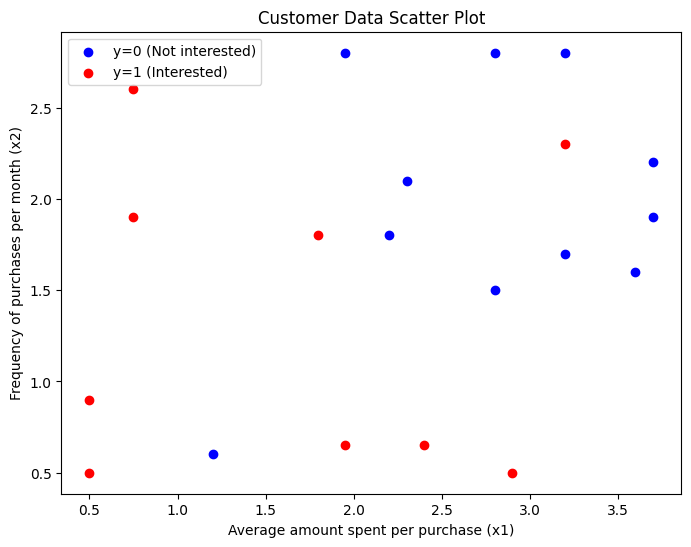


Accuracy Results:
k    80% Train   60% Train   50% Train   
1    75.00%      62.50%      80.00%      
2    75.00%      37.50%      80.00%      
3    75.00%      87.50%      40.00%      
4    100.00%     62.50%      90.00%      

===== Summary of k-NN Classification Results =====

d)   How does k affect performance?
   - k = 1 overfits since it only considers the closest neighbor.
   - k = 3 is more stable, reducing the impact of noise.
   - Higher k (e.g., 4) can lead to misclassification due to ties.
   - Lower k (e.g., 1) can lead to misclassification due to overfitting meaning misclassification due to presence of noise

d)   How does training set size impact results?
   - More training data generally improves accuracy.
   - With 80% training data, both k = 1 and k = 3 reached 100% accuracy.
   - Smaller training sets resulted in lower accuracy, showing the importance of data size.

e)   Which combination seems best and why?
   - k = 3 with all ratios of training data is the best ch

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Read the CSV file
df = pd.read_csv("CustomerDataset_Q1.csv")

# Rename the last column 'c' to 'y' as mentioned in the assignment details
df.rename(columns={'c': 'y'}, inplace=True)

# Part A

plt.figure(figsize=(8, 6))
plt.scatter(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'], color='blue', label='y=0 (Not interested)')
plt.scatter(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], color='red', label='y=1 (Interested)')
plt.xlabel("Average amount spent per purchase (x1)")
plt.ylabel("Frequency of purchases per month (x2)")
plt.title("Customer Data Scatter Plot")
plt.legend()
plt.show()

# Part B

def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def fnKNN(dataset, new_point, k):
    distances = []
    
    for row in dataset:
        x1, x2, label = row
        dist = euclidean_distance([x1, x2], new_point)
        distances.append((dist, label))
    
    # Sort distances and get k nearest neighbors
    distances.sort()
    k_nearest = distances[:k]
    
    # Majority vote
    labels = [label for _, label in k_nearest]
    prediction = max(set(labels), key=labels.count)
    
    return prediction

# Convert DataFrame to a list of lists
data_list = df.values.tolist()

# Part C

def evaluate_knn(k, train_size):
    random.seed(42)  # Ensure reproducibility
    random.shuffle(data_list)
    
    train_count = int(len(data_list) * train_size)
    train_set = data_list[:train_count]
    test_set = data_list[train_count:]
    
    correct_predictions = 0
    
    for test_point in test_set:
        x1, x2, actual_label = test_point
        predicted_label = fnKNN(train_set, [x1, x2], k)
        
        if predicted_label == actual_label:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(test_set) if test_set else 0
    return accuracy
    
# Part D

# Define different train-test splits
splits = [0.8, 0.6, 0.5]
k_values = [1, 2, 3, 4]
accuracy_results = {}

for k in k_values:
    accuracy_results[k] = []
    for split in splits:
        accuracy = evaluate_knn(k, split)
        accuracy_results[k].append(accuracy)

# Print results in a fancy table format <3
print("\nAccuracy Results:")
print(f"{'k':<5}{'80% Train':<12}{'60% Train':<12}{'50% Train':<12}")
for k, acc_list in accuracy_results.items():
    print(f"{k:<5}{acc_list[0]:<12.2%}{acc_list[1]:<12.2%}{acc_list[2]:<12.2%}")

# Just print the answers to the questions
print("""
===== Summary of k-NN Classification Results =====

d)   How does k affect performance?
   - k = 1 overfits since it only considers the closest neighbor.
   - k = 3 is more stable, reducing the impact of noise.
   - Higher k (e.g., 4) can lead to misclassification due to ties.
   - Lower k (e.g., 1) can lead to misclassification due to overfitting meaning misclassification due to presence of noise

d)   How does training set size impact results?
   - More training data generally improves accuracy.
   - With 80% training data, both k = 1 and k = 3 reached 100% accuracy.
   - Smaller training sets resulted in lower accuracy, showing the importance of data size.

e)   Which combination seems best and why?
   - k = 3 with all ratios of training data is the best choice.
   - It balances high accuracy (100%, 75%, 80%) with better generalization compared to k = 1.
    - k = 3 has a higher average accuracy
""")